In [1]:
!pip install torch==1.8.1

     |████████████████████████████████| 804.1MB 22kB/s 
ERROR: torchvision 0.8.2 has requirement torch==1.7.1, but you'll have torch 1.8.1 which is incompatible.
ERROR: fastai 2.3.0 has requirement torch<1.8,>=1.7.0, but you'll have torch 1.8.1 which is incompatible.
  Found existing installation: torch 1.7.1
    Uninstalling torch-1.7.1:
      Successfully uninstalled torch-1.7.1


In [2]:
#hide
#skip
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.


# Collaborative filtering

> Using the fastai library for collaborative filtering.

In [3]:
from fastai.tabular.all import *
from fastai.collab import *

## Load data

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
cd '/content/gdrive/MyDrive/CMPE_256-Prg_Ass1_014749488'

/content/gdrive/MyDrive/CMPE_256-Prg_Ass1_014749488


In [43]:
ratings = pd.read_csv('input/train.csv','\t')
ratings.head(2)


,user_id,book_id,rating
0,12726,7784,5
1,23770,104293,4


In [7]:
book_reviews = pd.read_csv('processed_data/processed_data/books_with_review.csv')
book_reviews.head(2)

,Unnamed: 0,book_id,title,review_text,ratings_count,is_ebook,average_rating,publication_year,url,description,image_url,isbn
0,0,287141,The Aeneid for Boys and Girls,kid love book ancient history,46,False,4.13,2006.0,https://www.goodreads.com/book/show/287141.The_Aeneid_for_Boys_and_Girls,"Relates in vigorous prose the tale of Aeneas, the legendary ancestor of Romulus, who escaped from the burning city of Troy and wandered the Mediterranean for years before settling in Italy. Patterned after the Iliad and the Odyssey, the Aeneid was composed as an epic poem by Virgil, to glorify the imperial city of Rome.",https://s.gr-assets.com/assets/nophoto/book/111x148-bcc042a9c91a29c1d680899eff700a03.png,1599150603
1,1,287141,The Aeneid for Boys and Girls,render story straightforward prose retain much formal beauty give age literally biblical church use phrase like give life save people shall people put away childish things ponder heart afterward connect aeneas formal found rome address british schoolchildren inform romans greatest gift law order shall learn older read prepare read elaborate verse translations,46,False,4.13,2006.0,https://www.goodreads.com/book/show/287141.The_Aeneid_for_Boys_and_Girls,"Relates in vigorous prose the tale of Aeneas, the legendary ancestor of Romulus, who escaped from the burning city of Troy and wandered the Mediterranean for years before settling in Italy. Patterned after the Iliad and the Odyssey, the Aeneid was composed as an epic poem by Virgil, to glorify the imperial city of Rome.",https://s.gr-assets.com/assets/nophoto/book/111x148-bcc042a9c91a29c1d680899eff700a03.png,1599150603


In [ ]:
# ratings = ratings.merge(book_reviews)
# ratings.head(2)

In [41]:
#Predicting For a single observation
#Test set data for row 0
test_data = pd.read_csv('input/test.csv','\t')
test_data.head(2)

,user_id,book_id
0,20989,1832332
1,37040,191139


## Training the model

In [58]:
dls = CollabDataLoaders.from_df(ratings,valid_pct=0.1)


In [60]:
dls.show_batch()

,user_id,book_id,rating
0,8884,90072,5
1,24160,8073,2
2,2431,17349153,0
3,24897,498954,5
4,3923,23317575,0
5,13190,8024682,0
6,6865,33016249,0
7,21451,17350491,5
8,33515,7779,3
9,25846,17491,4


SuggestedLRs(lr_min=6.30957365501672e-06, lr_steep=1.5848931980144698e-06)

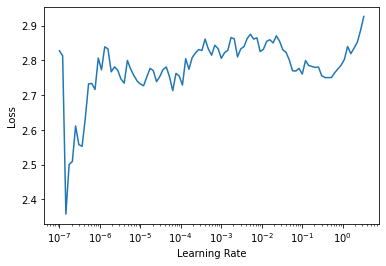

In [61]:
learn.lr_find()

In [62]:
learn = collab_learner(dls, n_factors=40, y_range=(0, 5),metrics= [rmse],wd=0.1)

In [63]:
learn.fit_one_cycle(2, 6.30957365501672e-06)

epoch,train_loss,valid_loss,_rmse,time
0,4.234717,4.207248,2.051157,01:26
1,4.199108,4.201708,2.049808,01:25


In [65]:
users = next(iter(dls.valid_ds))

In [67]:
preds = learn.model(users,items)
# print("Real\tPred\tDifference")
# for p in list(zip(ratings,preds))[:16]:
#   print('{}\t{:.1f}\t{:.1f}'.format(p[0],p[1],p[1]-p[0]))

NameError: ignored

In [ ]:
dls.test_dl

<bound method TabularDataLoaders.test_dl of <fastai.tabular.data.TabularDataLoaders object at 0x7fa5fe170410>>

In [ ]:
#Predicting For The Complete Test set
test_predictions = learn.get_preds(ds_type=DatasetType.Test)[0]
#Converting the tensor output to a list of predicted values
test_predictions = [i[0] for i in test_predictions.tolist()]
#Converting the prediction to . a dataframe
test_predictions = pd.DataFrame(test_predictions, columns = ['rating'])
#Writing the predictions to an excel file.
import pandas as pd
predictions.to_csv("output/predictions_Fast_ai.csv")

## Interpretation

In [ ]:
g = ratings.groupby('book_id')['rating'].count()
top_books = g.sort_values(ascending=False).index.values[:1000]
top_books[:10]

array([     5,   3636,  24178, 157993,   2998,  30119, 370493,   8127,
        38709,  19543])

In [ ]:
book_bias = learn.model.bias(top_books, is_item=True)
book_bias.shape

torch.Size([1000])

In [ ]:
mean_ratings = ratings.groupby('book_id')['rating'].mean()
book_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_books,book_bias)]

In [ ]:
item0 = lambda o:o[0]
sorted(book_ratings, key=item0)[:15]

[(tensor(-0.5421), 33158525, 0.5212121212121212),
 (tensor(-0.5303), 13438677, 0.49044585987261147),
 (tensor(-0.4938), 10425811, 1.0198675496688743),
 (tensor(-0.4794), 10893214, 0.7264150943396226),
 (tensor(-0.4716), 176327, 1.375),
 (tensor(-0.4575), 24396876, 1.2035623409669212),
 (tensor(-0.4449), 33016249, 0.7878787878787878),
 (tensor(-0.3952), 1900124, 0.8571428571428571),
 (tensor(-0.3872), 15944406, 1.4792079207920792),
 (tensor(-0.3860), 630879, 1.5060240963855422),
 (tensor(-0.3807), 10637959, 1.3584905660377358),
 (tensor(-0.3767), 386765, 1.0928571428571427),
 (tensor(-0.3643), 74720, 1.2183908045977012),
 (tensor(-0.3583), 22915, 1.2251655629139073),
 (tensor(-0.3528), 11607446, 1.5167548500881833)]

best bias:

In [ ]:
sorted(book_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.8513), 5, 3.9645054847052528),
 (tensor(0.5806), 44186, 4.01460823373174),
 (tensor(0.5498), 90072, 4.350961538461538),
 (tensor(0.4816), 310259, 3.7436399217221137),
 (tensor(0.4529), 113946, 3.825301204819277),
 (tensor(0.4172), 4948, 3.7789543348775645),
 (tensor(0.4170), 30119, 3.703473659995399),
 (tensor(0.4140), 301736, 3.8193202146690517),
 (tensor(0.3952), 767680, 3.7198824681684624),
 (tensor(0.3902), 7788, 4.165829145728643),
 (tensor(0.3871), 125507, 3.8467065868263473),
 (tensor(0.3768), 30118, 3.7159152634437804),
 (tensor(0.3603), 231850, 3.782122905027933),
 (tensor(0.3552), 196970, 3.85667215815486),
 (tensor(0.3390), 370493, 3.5198102016607353)]

In [ ]:
book_w = learn.model.weight(top_books, is_item=True)
book_w.shape

torch.Size([1000, 150])

In [ ]:
book_pca = book_w.pca(3)
book_pca.shape

torch.Size([1000, 3])

In [ ]:
fac0,fac1,fac2 = book_pca.t()
book_comp = [(f, i) for f,i in zip(fac0, top_books)]

In [ ]:
sorted(book_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(2.1279), 23772),
 (tensor(2.0326), 19543),
 (tensor(1.8784), 233093),
 (tensor(1.8583), 24178),
 (tensor(1.7529), 191139),
 (tensor(1.7257), 5),
 (tensor(1.7061), 30119),
 (tensor(1.6688), 113946),
 (tensor(1.6008), 4948),
 (tensor(1.5557), 90072)]

In [ ]:
sorted(book_comp, key=itemgetter(0))[:10]

[(tensor(-2.1075), 10893214),
 (tensor(-1.9661), 24396876),
 (tensor(-1.8647), 10425811),
 (tensor(-1.8297), 13129136),
 (tensor(-1.8290), 10959),
 (tensor(-1.7990), 18222716),
 (tensor(-1.7947), 25937866),
 (tensor(-1.7915), 28953953),
 (tensor(-1.7660), 22098550),
 (tensor(-1.7560), 33016249)]

In [ ]:
book_comp = [(f, i) for f,i in zip(fac1, top_books)]

In [ ]:
sorted(book_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(3.5758), 297792),
 (tensor(3.4931), 172327),
 (tensor(3.4871), 324277),
 (tensor(3.4237), 131123),
 (tensor(3.3777), 65111),
 (tensor(3.3639), 150037),
 (tensor(3.3148), 438492),
 (tensor(3.2746), 65118),
 (tensor(3.2720), 78418),
 (tensor(3.1885), 65119)]

In [ ]:
sorted(book_comp, key=itemgetter(0))[:10]

[(tensor(-0.8456), 10959),
 (tensor(-0.6946), 22917),
 (tensor(-0.6852), 444381),
 (tensor(-0.6706), 2998),
 (tensor(-0.6454), 41684),
 (tensor(-0.5871), 8248),
 (tensor(-0.5621), 161099),
 (tensor(-0.5575), 93),
 (tensor(-0.5237), 77270),
 (tensor(-0.5165), 87294)]

# Viewing similar books

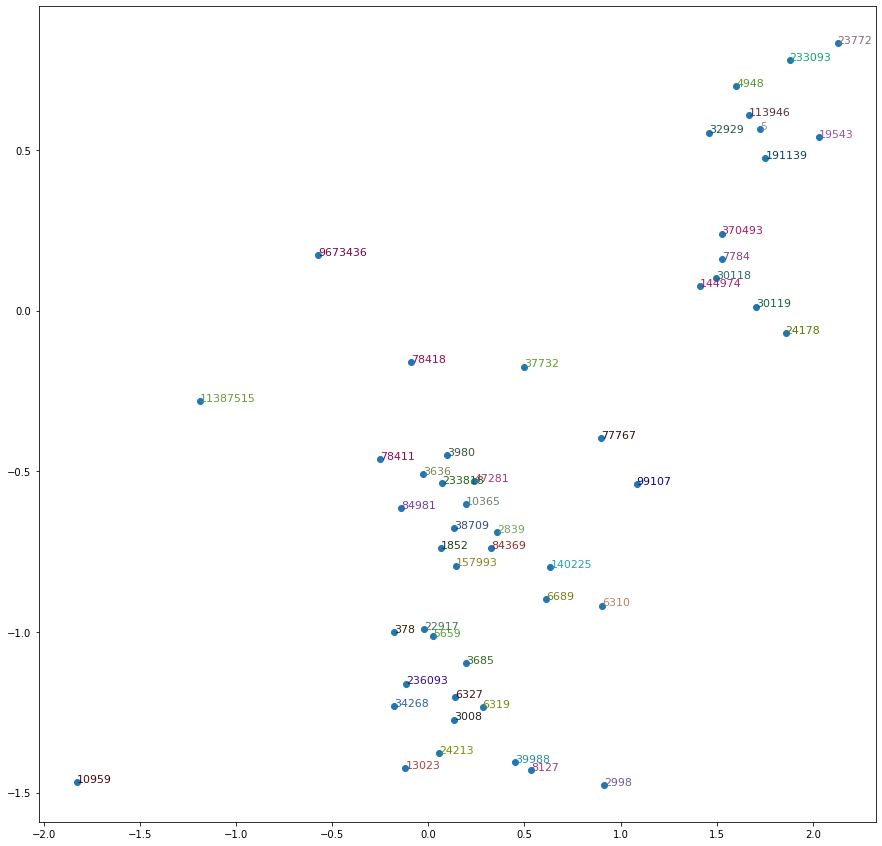

In [ ]:
idxs = np.random.choice(len(top_books), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_books[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()